# Wisconsin Breast Cancer Diagnosed
## Programming Language: R
## Data Preprocessing

- Load data and drop last empty column

In [2]:
library(tidyverse)
breast_cancer = read.csv("data.csv")
breast_cancer$X <- NULL
breast_cancer$id <- NULL
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


- Fix data columns name.
- Turn column "diagnosis" value from M/B to 1/0. It can help us to run the models.

In [3]:
colnames(breast_cancer) <- c('diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst')

mutate(breast_cancer, diagnosis = recode(diagnosis,"M"="1",
                                         "B"="0")) -> breast_cancer

breast_cancer$diagnosis <- as.numeric(breast_cancer$diagnosis)
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Split data

In [4]:
set.seed(1)
n = nrow(breast_cancer) # 568
z = sample(n, 0.8*n) # 0.8 for train/ 0.2 for test

## Random Forest

- Model default has 5 variables to try at each split.
- Error rate 3.5%

In [5]:
# rule of thumb : m ~= root(p)
p = ncol(breast_cancer) -1 # -diagnosis
p
sqrt(p) # No. of variables tried at each split: 5

[1] 30

[1] 5.477226

In [7]:
library(randomForest)
set.seed(1)
train_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer, subset= z) # -diagnosis
train_RF # error rate: 4.84%


Call:
 randomForest(formula = as.factor(diagnosis) ~ ., data = breast_cancer,      subset = z) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 4.84%
Confusion matrix:
    0   1 class.error
0 279   7  0.02447552
1  15 154  0.08875740

In [8]:
yhat = predict(train_RF, newdata= breast_cancer[-z,], type="class")

table(yhat, breast_cancer$diagnosis[-z])
mean(yhat!= breast_cancer$diagnosis[-z]) # 3.5% error rate.

    
yhat  0  1
   0 70  3
   1  1 40

[1] 0.03508772

## Tuning 

- Try 30 variables, 100 trees at first.
- Get 7% error rate. Worse than before (5 variables, 500 trees)

In [9]:
set.seed(1)
train_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer, subset= z, mtry= 30, ntree= 100)
train_RF # error rate: 4.62%


Call:
 randomForest(formula = as.factor(diagnosis) ~ ., data = breast_cancer,      mtry = 30, ntree = 100, subset = z) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 30

        OOB estimate of  error rate: 4.62%
Confusion matrix:
    0   1 class.error
0 278   8  0.02797203
1  13 156  0.07692308

In [10]:
yhat = predict(train_RF, newdata= breast_cancer[-z,], type="class")

table(yhat, breast_cancer$diagnosis[-z])
mean(yhat!= breast_cancer$diagnosis[-z]) # 7% error rate. get worse than 5 variables,500 trees

    
yhat  0  1
   0 68  5
   1  3 38

[1] 0.07017544

In [11]:
set.seed(1)
n = nrow(breast_cancer)
z = sample(n, n*0.8)

ERRORRATE = rep(0,p) # p = 11 predictors. try every predictors to find the best random forest
optimaltrees = rep(0,p)

for(k in 1:p){
  train_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer[z,], mtry= k)
  optimaltrees[k] = which.min(train_RF$err.rate) # In each variables selection, number with lowest mse = optimal trees.
  
  train_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer[z,], mtry= k, ntree= optimaltrees[k])
  yhat = predict(train_RF, newdata = breast_cancer[-z,])
  
  ERRORRATE[k] = mean(yhat!= breast_cancer$diagnosis[-z])
  #plot(train_RF$err.rate)
}

In [12]:
which.min(ERRORRATE) # 3

[1] 3

In [13]:
optimaltrees[3]
optimaltrees # HOW MANY TREE FOR EACH VARIABLE SPLIT

[1] 559

[1] 687 548 559 700 575 545 612 633 638 524 541 653 827 536 520 529 673 984 532
[20] 541 694 773 652 513 565 890 719 530 630 503

## Fit best random forest model to test

- Compare with 30 variables and 100 trees model
- Get lower error rate. From 7% to 4.38%

In [14]:
# fit best random forest trees
set.seed(1)
best_RF = randomForest(as.factor(diagnosis)~., data= breast_cancer[z,], mtry= 3, ntree= 559) 
best_RF # training 4.62 -> 4.4% error rate


Call:
 randomForest(formula = as.factor(diagnosis) ~ ., data = breast_cancer[z,      ], mtry = 3, ntree = 559) 
               Type of random forest: classification
                     Number of trees: 559
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.4%
Confusion matrix:
    0   1 class.error
0 279   7  0.02447552
1  13 156  0.07692308

In [15]:
yhat = predict(best_RF, newdata= breast_cancer[-z,], type="class")

table(yhat, breast_cancer$diagnosis[-z])
mean(yhat!= breast_cancer$diagnosis[-z]) 
# testing 7% -> 4.38%

    
yhat  0  1
   0 70  4
   1  1 39

[1] 0.04385965

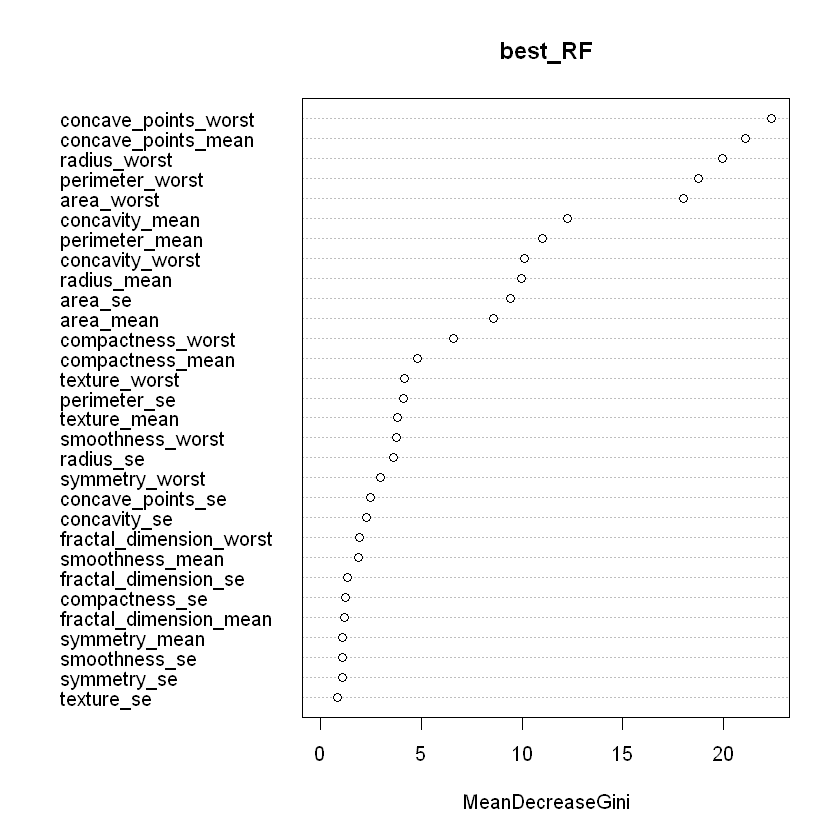

In [17]:
#importance(best_RF) 
varImpPlot(best_RF)

# Logistic Regression

## Data Preprocessing (Same as Random Forest)

In [41]:
breast_cancer = read.csv("data.csv")
breast_cancer$X <- NULL
breast_cancer$id <- NULL
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [42]:
library(tidyverse)
colnames(breast_cancer) <- c('diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst')


head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Split Data

In [43]:
set.seed(1)
n = nrow(breast_cancer) # 568
z = sample(n, 0.8*n) # 0.8 for train/ 0.2 for test

In [44]:
table(breast_cancer$diagnosis)


  B   M 
357 212 

## Use step-forward variables selection

In [45]:
full <- glm(as.factor(diagnosis)~., data= breast_cancer, family = "binomial")
null <- glm(as.factor(diagnosis)~1, data= breast_cancer,  family = "binomial")

step(null, scope = list(lower = null, upper = full), method = "forward")

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Start:  AIC=753.44
as.factor(diagnosis) ~ 1



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                          Df Deviance    AIC
+ perimeter_worst          1   209.48 213.48
+ radius_worst             1   229.11 233.11
+ area_worst               1   230.64 234.64
+ concave_points_worst     1   250.45 254.45
+ concave_points_mean      1   258.92 262.92
+ perimeter_mean           1   304.48 308.48
+ area_mean                1   325.66 329.66
+ radius_mean              1   330.01 334.01
+ area_se                  1   359.50 363.50
+ concavity_mean           1   383.23 387.23
+ concavity_worst          1   437.70 441.70
+ perimeter_se             1   472.83 476.83
+ radius_se                1   480.65 484.65
+ compactness_worst        1   505.55 509.55
+ compactness_mean         1   508.79 512.79
+ texture_worst            1   622.07 626.07
+ symmetry_worst           1   641.42 645.42
+ smoothness_worst         1   641.42 645.42
+ concave_points_se        1   646.01 650.01
+ texture_mean             1   646.52 650.52
+ smoothness_mean          1   673.95 677.95
+ symmetry

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                          Df Deviance    AIC
+ smoothness_worst         1   139.18 145.18
+ concave_points_worst     1   149.59 155.59
+ texture_worst            1   159.68 165.68
+ concave_points_mean      1   162.47 168.47
+ smoothness_mean          1   165.18 171.18
+ symmetry_worst           1   167.85 173.85
+ concavity_worst          1   168.55 174.55
+ concavity_mean           1   169.79 175.79
+ fractal_dimension_worst  1   170.68 176.68
+ radius_mean              1   173.15 179.15
+ compactness_worst        1   175.42 181.42
+ symmetry_mean            1   177.18 183.18
+ fractal_dimension_mean   1   177.62 183.62
+ texture_mean             1   178.63 184.63
+ area_mean                1   180.70 186.70
+ compactness_mean         1   181.84 187.84
+ perimeter_mean           1   183.59 189.59
+ smoothness_se            1   191.06 197.06
+ texture_se               1   195.30 201.30
+ concave_points_se        1   198.67 204.67
+ radius_se                1   199.25 205.25
+ area_se 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                          Df Deviance    AIC
+ texture_worst            1   103.61 111.61
+ texture_mean             1   106.84 114.84
+ texture_se               1   122.51 130.51
+ area_se                  1   123.42 131.42
+ radius_se                1   124.90 132.90
+ perimeter_se             1   130.42 138.42
+ concavity_mean           1   133.31 141.31
+ symmetry_worst           1   134.45 142.45
+ area_worst               1   134.65 142.65
+ symmetry_se              1   135.31 143.31
+ concave_points_mean      1   135.35 143.35
+ concave_points_worst     1   135.57 143.57
+ concavity_worst          1   135.97 143.97
+ symmetry_mean            1   136.21 144.21
+ concave_points_se        1   136.32 144.32
<none>                         139.18 145.18
+ concavity_se             1   137.42 145.42
+ radius_worst             1   137.53 145.53
+ radius_mean              1   137.66 145.66
+ perimeter_mean           1   137.81 145.81
+ smoothness_se            1   138.54 146.54
+ area_mea

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=111.61
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance    AIC
+ radius_se                1    87.20  97.20
+ area_se                  1    87.44  97.44
+ perimeter_se             1    94.24 104.24
+ concave_points_mean      1    94.88 104.88
+ concave_points_se        1    98.63 108.63
+ symmetry_mean            1    98.67 108.67
+ concavity_mean           1    98.73 108.73
+ symmetry_se              1    98.83 108.83
+ concave_points_worst     1    99.35 109.35
+ symmetry_worst           1   100.17 110.17
+ area_worst               1   100.53 110.53
+ radius_worst             1   101.50 111.50
<none>                         103.61 111.61
+ smoothness_mean          1   101.83 111.83
+ concavity_worst          1   102.51 112.51
+ concavity_se             1   102.56 112.56
+ texture_mean             1   103.22 113.22
+ fractal_dimension_se     1   103.22 113.22
+ texture_se               1   103.24 113.24
+ smoothness_se            1   103.29 113.29
+ compactness_worst        1   103.36 113.36
+ compactn

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=97.2
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    radius_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance    AIC
+ symmetry_worst           1    79.07  91.07
+ concave_points_worst     1    79.20  91.20
+ texture_se               1    82.56  94.56
+ concave_points_mean      1    84.00  96.00
+ concavity_worst          1    84.15  96.15
+ fractal_dimension_se     1    84.29  96.29
+ symmetry_mean            1    84.54  96.54
+ compactness_se           1    84.89  96.89
+ perimeter_se             1    85.15  97.15
+ concavity_mean           1    85.16  97.16
<none>                          87.20  97.20
+ area_worst               1    85.80  97.80
+ smoothness_se            1    85.81  97.81
+ symmetry_se              1    86.03  98.03
+ radius_worst             1    86.03  98.03
+ compactness_mean         1    86.60  98.60
+ fractal_dimension_mean   1    86.73  98.73
+ perimeter_mean           1    86.78  98.78
+ radius_mean              1    86.87  98.87
+ area_mean                1    87.04  99.04
+ texture_mean             1    87.05  99.05
+ smoothne

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=91.07
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    radius_se + symmetry_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ compactness_se           1   74.511  88.511
+ concave_points_worst     1   74.850  88.850
+ fractal_dimension_se     1   75.551  89.551
+ texture_se               1   75.869  89.869
+ area_worst               1   76.196  90.196
+ compactness_mean         1   76.436  90.436
+ perimeter_se             1   76.737  90.737
+ radius_worst             1   76.821  90.821
+ fractal_dimension_mean   1   76.900  90.900
+ concave_points_mean      1   76.974  90.974
<none>                         79.073  91.073
+ compactness_worst        1   77.638  91.638
+ concavity_worst          1   78.142  92.142
+ symmetry_se              1   78.211  92.211
+ fractal_dimension_worst  1   78.336  92.336
+ concavity_mean           1   78.438  92.438
+ area_se                  1   78.494  92.494
+ smoothness_mean          1   78.730  92.730
+ smoothness_se            1   78.772  92.772
+ symmetry_mean            1   78.803  92.803
+ area_mean                1   78.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=88.51
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    radius_se + symmetry_worst + compactness_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ concavity_mean           1   65.529  81.529
+ concave_points_worst     1   65.593  81.593
+ concave_points_mean      1   67.066  83.066
+ concavity_worst          1   67.234  83.234
+ concave_points_se        1   68.551  84.551
+ concavity_se             1   69.777  85.777
<none>                         74.511  88.511
+ texture_se               1   72.725  88.725
+ perimeter_se             1   73.232  89.232
+ smoothness_se            1   73.614  89.614
+ area_se                  1   73.733  89.733
+ area_worst               1   74.085  90.085
+ radius_worst             1   74.330  90.330
+ symmetry_se              1   74.406  90.406
+ fractal_dimension_mean   1   74.408  90.408
+ texture_mean             1   74.443  90.443
+ compactness_mean         1   74.471  90.471
+ fractal_dimension_worst  1   74.482  90.482
+ smoothness_mean          1   74.491  90.491
+ perimeter_mean           1   74.498  90.498
+ compactness_worst        1   74.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=81.53
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    radius_se + symmetry_worst + compactness_se + concavity_mean



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ texture_se               1   61.258  79.258
+ concave_points_worst     1   61.850  79.850
+ area_se                  1   63.217  81.217
<none>                         65.529  81.529
+ perimeter_se             1   63.661  81.661
+ area_worst               1   63.951  81.951
+ concave_points_se        1   63.965  81.965
+ radius_worst             1   64.003  82.003
+ compactness_mean         1   64.078  82.078
+ concavity_worst          1   64.328  82.328
+ concave_points_mean      1   64.438  82.438
+ fractal_dimension_mean   1   64.621  82.621
+ smoothness_se            1   64.905  82.905
+ symmetry_mean            1   64.943  82.943
+ fractal_dimension_se     1   65.196  83.196
+ texture_mean             1   65.351  83.351
+ smoothness_mean          1   65.353  83.353
+ symmetry_se              1   65.399  83.399
+ area_mean                1   65.487  83.487
+ concavity_se             1   65.506  83.506
+ radius_mean              1   65.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=79.26
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    radius_se + symmetry_worst + compactness_se + concavity_mean + 
    texture_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ area_se                  1   58.643  78.643
+ concave_points_worst     1   58.739  78.739
+ area_worst               1   59.167  79.167
<none>                         61.258  79.258
+ radius_worst             1   59.387  79.387
+ perimeter_se             1   59.954  79.954
+ compactness_mean         1   60.049  80.049
+ concave_points_se        1   60.277  80.277
+ concave_points_mean      1   60.323  80.323
+ texture_mean             1   60.489  80.489
+ fractal_dimension_mean   1   60.498  80.498
+ fractal_dimension_se     1   60.500  80.500
+ concavity_worst          1   60.579  80.579
+ smoothness_se            1   60.674  80.674
+ area_mean                1   61.103  81.103
+ radius_mean              1   61.162  81.162
+ compactness_worst        1   61.166  81.166
+ fractal_dimension_worst  1   61.191  81.191
+ smoothness_mean          1   61.214  81.214
+ symmetry_mean            1   61.254  81.254
+ perimeter_mean           1   61.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=78.64
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    radius_se + symmetry_worst + compactness_se + concavity_mean + 
    texture_se + area_se



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ concave_points_worst     1   54.713  76.713
- radius_se                1   58.756  76.756
<none>                         58.643  78.643
+ radius_worst             1   57.113  79.113
- area_se                  1   61.258  79.258
+ concave_points_se        1   57.485  79.485
+ concavity_worst          1   57.520  79.520
+ perimeter_se             1   57.525  79.525
+ texture_mean             1   57.593  79.593
+ concave_points_mean      1   57.669  79.669
+ area_worst               1   57.684  79.684
+ compactness_mean         1   58.146  80.146
+ symmetry_se              1   58.236  80.236
+ perimeter_mean           1   58.374  80.374
+ fractal_dimension_worst  1   58.382  80.382
+ fractal_dimension_se     1   58.503  80.503
+ compactness_worst        1   58.538  80.538
+ fractal_dimension_mean   1   58.549  80.549
+ radius_mean              1   58.590  80.590
+ area_mean                1   58.590  80.590
+ smoothness_se            1   58.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=76.71
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    radius_se + symmetry_worst + compactness_se + concavity_mean + 
    texture_se + area_se + concave_points_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
- radius_se                1   55.085  75.085
- perimeter_worst          1   56.036  76.036
<none>                         54.713  76.713
+ radius_worst             1   52.749  76.749
+ area_worst               1   52.828  76.828
+ compactness_mean         1   52.833  76.833
+ perimeter_se             1   53.106  77.106
+ symmetry_mean            1   53.896  77.896
+ texture_mean             1   53.934  77.934
- texture_se               1   58.162  78.162
+ symmetry_se              1   54.209  78.209
+ concavity_worst          1   54.216  78.216
+ smoothness_se            1   54.233  78.233
+ perimeter_mean           1   54.240  78.240
+ smoothness_mean          1   54.399  78.399
+ concavity_se             1   54.555  78.555
+ concave_points_se        1   54.569  78.569
+ radius_mean              1   54.594  78.594
+ compactness_worst        1   54.605  78.605
+ fractal_dimension_mean   1   54.611  78.611
- concave_points_worst     1   58.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=75.08
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    symmetry_worst + compactness_se + concavity_mean + texture_se + 
    area_se + concave_points_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
+ area_worst               1   52.849  74.849
+ compactness_mean         1   52.926  74.926
+ radius_worst             1   52.946  74.946
<none>                         55.085  75.085
+ perimeter_se             1   53.113  75.113
+ symmetry_mean            1   54.126  76.126
+ texture_mean             1   54.180  76.180
+ smoothness_se            1   54.455  76.455
+ concavity_worst          1   54.456  76.456
+ smoothness_mean          1   54.701  76.701
+ radius_se                1   54.713  76.713
+ symmetry_se              1   54.735  76.735
- concave_points_worst     1   58.756  76.756
- texture_se               1   58.784  76.784
+ fractal_dimension_mean   1   54.841  76.841
+ compactness_worst        1   54.892  76.892
+ perimeter_mean           1   54.902  76.902
+ concave_points_se        1   54.966  76.966
+ concavity_se             1   54.979  76.979
+ fractal_dimension_se     1   55.001  77.001
+ area_mean                1   55.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=74.85
as.factor(diagnosis) ~ perimeter_worst + smoothness_worst + texture_worst + 
    symmetry_worst + compactness_se + concavity_mean + texture_se + 
    area_se + concave_points_worst + area_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
- perimeter_worst          1   53.097  73.097
<none>                         52.849  74.849
- area_worst               1   55.085  75.085
+ perimeter_mean           1   51.937  75.937
+ radius_mean              1   52.037  76.037
+ compactness_mean         1   52.120  76.120
+ smoothness_se            1   52.127  76.127
+ area_mean                1   52.167  76.167
+ symmetry_mean            1   52.512  76.512
+ concavity_se             1   52.546  76.546
+ fractal_dimension_se     1   52.559  76.559
- texture_se               1   56.583  76.583
+ texture_mean             1   52.632  76.632
+ concave_points_mean      1   52.681  76.681
+ symmetry_se              1   52.691  76.691
+ radius_worst             1   52.737  76.737
+ concave_points_se        1   52.744  76.744
+ fractal_dimension_mean   1   52.744  76.744
+ concavity_worst          1   52.753  76.753
+ perimeter_se             1   52.756  76.756
+ smoothness_mean          1   52.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=73.1
as.factor(diagnosis) ~ smoothness_worst + texture_worst + symmetry_worst + 
    compactness_se + concavity_mean + texture_se + area_se + 
    concave_points_worst + area_worst



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                          Df Deviance     AIC
<none>                         53.097  73.097
+ perimeter_mean           1   51.943  73.943
+ radius_mean              1   52.051  74.051
+ compactness_mean         1   52.122  74.122
+ area_mean                1   52.261  74.261
+ smoothness_se            1   52.431  74.431
- texture_se               1   56.594  74.594
+ symmetry_mean            1   52.689  74.689
+ texture_mean             1   52.751  74.751
+ perimeter_se             1   52.759  74.759
+ perimeter_worst          1   52.849  74.849
+ concavity_worst          1   52.885  74.885
+ fractal_dimension_se     1   52.933  74.933
+ concave_points_se        1   52.940  74.940
+ symmetry_se              1   52.946  74.946
+ smoothness_mean          1   52.991  74.991
+ fractal_dimension_mean   1   53.020  75.020
+ compactness_worst        1   53.025  75.025
+ concave_points_mean      1   53.070  75.070
+ concavity_se             1   53.089  75.089
+ radius_se                1   53.


Call:  glm(formula = as.factor(diagnosis) ~ smoothness_worst + texture_worst + 
    symmetry_worst + compactness_se + concavity_mean + texture_se + 
    area_se + concave_points_worst + area_worst, family = "binomial", 
    data = breast_cancer)

Coefficients:
         (Intercept)      smoothness_worst         texture_worst  
          -4.438e+01             6.554e+01             5.412e-01  
      symmetry_worst        compactness_se        concavity_mean  
           1.561e+01            -1.166e+02             3.737e+01  
          texture_se               area_se  concave_points_worst  
          -2.611e+00             2.265e-01             3.918e+01  
          area_worst  
           9.603e-03  

Degrees of Freedom: 568 Total (i.e. Null);  559 Residual
Null Deviance:	    751.4 
Residual Deviance: 53.1 	AIC: 73.1

## Fit model
- Get error rate 1.7%

In [46]:
logit_train = glm(as.factor(diagnosis) ~ smoothness_worst + texture_worst + symmetry_worst +
                            compactness_se + concavity_mean + texture_se + area_se +
                            concave_points_worst + area_worst,
                             family = "binomial", data = breast_cancer[z,])

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [47]:
thresh <- 0.5
pred.probs = predict(logit_train, type="response", newdata = breast_cancer[-z,]) # probability
pred <- ifelse(pred.probs > thresh, 1, 0)

conf.mat <- table("Predicted"=pred, "Actual"=breast_cancer[-z,]$diagnosis)
conf.mat # error rate = 1.7%

         Actual
Predicted  B  M
        0 70  1
        1  1 42

## Tuning model. Adjust threshold 

In [48]:
logit_train = glm(as.factor(diagnosis) ~ smoothness_worst + texture_worst + symmetry_worst +
                            compactness_se + concavity_mean + texture_se + area_se +
                            concave_points_worst + area_worst,
                             family = "binomial", data = breast_cancer[z,])

pred.probs = predict(logit_train, type="response", newdata = breast_cancer[z,]) 


threshold = seq(0, 1, 0.01) # 0, 0.01, 0.02, ...1
err.rate = rep(0, 101)

for (k in 1:101){
  yhat = rep("A", length(z)) 
  yhat[pred.probs >= threshold[k]] = "M"
  yhat[pred.probs < threshold[k]] = "B"
  err.rate[k] = mean(yhat != breast_cancer[z,]$diagnosis)
}

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [49]:
which.min(err.rate)

[1] 58

In [50]:
threshold[58] # threshold = 0.57
min(err.rate) # 0.9% error rate

[1] 0.57

[1] 0.008791209

## Test data
- Still have same error rate 1.7% as like before tuning.

In [52]:
thresh <- 0.57
pred.probs = predict(logit_train, type="response", newdata = breast_cancer[-z,]) # probability
pred <- ifelse(pred.probs > thresh, 1, 0)

conf.mat <- table("Predicted"=pred, "Actual"=breast_cancer[-z,]$diagnosis)
conf.mat # still same, error rate = 1.7%

         Actual
Predicted  B  M
        0 70  1
        1  1 42

## Result 

- In this data, Logistic Regression is better than Random Forest (error rate: 1.7% better than 4.4%). It is acceptable anwser beacuse usually we will choose logistic regression when we only have two labels on output variables. When we have more than two labels to classify, we would prefer to use decision tree/ LDA/ KNN or random forest.
- Random Forest model can build a robust model because Random Forest, unlike BAGGING, are trees de-correlated and prune the trees. On the other hand, BAGGING trees uses the entire feature so numbers of trees may be strongly correlated. In this project, after tuning, I have the best model with 3 variables tried to split in each nodes and 559 trees. Moreover, I find 'concave points worst' is the most important feature in the model. And 'concave points mean', 'radius worst', 'perimeter_worst', and 'area worst' are also important than remain variables.